# K-Nearest Neighbor(KNN) Algorithm for Machine Learning

- based on Supervised Learning technique.

- K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm

- used for Regression as well as for Classification but mostly it is used for the Classification problems

- K-NN is a non-parametric algorithm

# Why do we need a K-NN Algorithm?

Suppose there are two categories, i.e., Category A and Category B, and we have a new data point x1, so this data point will lie in which of these categories. To solve this type of problem, we need a K-NN algorithm. With the help of K-NN, we can easily identify the category or class of a particular dataset. Consider the below diagram:

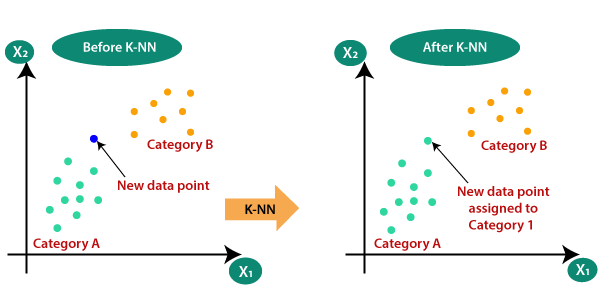

In [8]:
from IPython.display import Image
Image('/content/knn1.png')

Steps:

1. Select the number K of the neighbors

2. Calculate the Euclidean distance of K number of neighbors

          
          

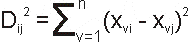

In [10]:
Image('/content/euclid2.jpg')

3. Take the K nearest neighbors as per the calculated Euclidean distance

4. Among these k neighbors, count the number of the data points in each category

5. Assign the new data points to that category for which the number of the neighbor is maximum

6. Our Model is ready

In [2]:
import numpy as np
from collections import Counter

def euclidean_distance(x1,x2):
  return np.sqrt(np.sum((x1-x2)**2))

class KNN:
  def __init__(self, k=3):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    y_pred = [ self._predict(x) for x in X ]
    return np.array(y_pred)

  def _predict(self, x):
    # get the distances
    distances = [ euclidean_distance(x, x_train) for x_train in self.X_train ]

    # Sort by distance and return indices of the first k neighbors
    k_idx = np.argsort(distances)[:self.k]

    # Extract the labels of the k nearest neighbor training samples
    k_nearest_labels = [ self.y_train[i] for i in k_idx ]

    # return the most common class label
    most_common = Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]


In [3]:
if __name__ =='__main__':
  # importing the dependencies
  import numpy as np
  from sklearn import datasets
  from sklearn.model_selection import train_test_split
  
  def accuracy(y_true, y_pred):
    acc = np.sum(y_true == y_pred)/len(y_true)
    return acc

  # loading the iris dataset
  iris = datasets.load_iris()
  X, y = iris.data ,iris.target

  # Spliting the dataset into training and testing data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

  # modeling 
  clf = KNN(k=3)
  # fitting the traning data 
  clf.fit(X_train, y_train)
  # predicting the labels of test data
  predictions = clf.predict(X_test)

  # Accuracy
  print('KNN accuracy is : ', accuracy(y_test, predictions))



KNN accuracy is :  1.0
